# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Ryan Smith - Github: https://github.com/RP1507/web-scraping-Module6

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

## Question 1:

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [190]:
import requests

#response = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work') testing

#print(response.status_code)
#print(response.headers['content-type']) testing 

from bs4 import BeautifulSoup

parser = 'html5lib'

soup = BeautifulSoup(response.text, parser)

article_page = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work')
article_html = article_page.text

import pickle

with open('laserheadlights.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)
    


## Question 2:

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [191]:
with open('laserheadlights.pkl', 'rb') as f:
    article_html = pickle.load(f)
    
soup = BeautifulSoup(article_html, parser)

article_element = soup.find('article')

print(article_element.get_text())


    
        How Laser Headlights Work
        
            
                130 Comments            
            
                by:
                Lewin Day
            
        

        
            March 22, 2021
            
                
                
            
        

        
    

    
        When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first i

## Question 3:

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [192]:
import spacy
from collections import Counter

nlp = spacy.load('en_core_web_sm')
doc = nlp(article_element.get_text())


# Remove whitespace, punctuation, and stopword tokens
# Convert all letters to lowercase

def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [str(token).lower() for token in doc if we_care_about(token)]
word_freq = Counter(map(str,interesting_tokens))
print('The top 5 most frequent tokens are: ', word_freq.most_common(5))

top_tokens = set()
for token, freq in word_freq.most_common(5):
    top_tokens.add(token)
print('Most Frequent Tokens:', top_tokens)

The top 5 most frequent tokens are:  [('laser', 35), ('headlights', 19), ('headlight', 11), ('technology', 10), ('led', 10)]
Most Frequent Tokens: {'led', 'laser', 'headlights', 'technology', 'headlight'}


## Question 4:

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [193]:
interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)
print('The top 5 most frequent lemmas ', lemma_freq.most_common(5))

top_lemmas = set()
for token, freq in lemma_freq.most_common(5):
    top_lemmas.add(token)
print('Most Frequent Lemmas:', top_lemmas)

The top 5 most frequent lemmas  [('laser', 40), ('headlight', 28), ('beam', 12), ('led', 12), ('light', 11)]
Most Frequent Lemmas: {'led', 'laser', 'light', 'beam', 'headlight'}


## Question 5:

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [194]:
def score_sentence_by_token(sentence, top_tokens):
    tokens = 0
    words = 0
    for token in sentences[sentence]:
        if not(token.is_space or token.is_punct):
            words += 1
        if token.text.lower() in top_tokens:
            tokens += 1
    return tokens/words

sentences = list(doc.sents)
sentence = sentences[0]
score = score_sentence_by_token(0, top_tokens)

print('Score sentence by token:',score)
print('Top 5 tokens were:',top_tokens)
print(sentence)

Score sentence by token: 0.12121212121212122
Top 5 tokens were: {'led', 'laser', 'headlights', 'technology', 'headlight'}

    
        How Laser Headlights Work
        
            
                130 Comments            
            
                by:
                Lewin Day
            
        

        
            March 22, 2021
            
                
                
            
        

        
    

    
        When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.


In [195]:
# score sentence by lemma
    
def score_sentence_by_lemma(sentence, top_lemmas):
    lemmas = 0
    words = 0
    for lemma in sentences[sentence]:
        if not(lemma.is_space or lemma.is_punct):
            words += 1
        if lemma.text.lower() in top_lemmas:
            lemmas += 1
    return lemmas/words

sentences = list(doc.sents)
sentence = sentences[0]
score = score_sentence_by_lemma(0,top_lemmas)

print('Score sentence by lemma:',score)
print('Top 5 Lemmas were:', top_lemmas)
print(sentence)

Score sentence by lemma: 0.030303030303030304
Top 5 Lemmas were: {'led', 'laser', 'light', 'beam', 'headlight'}

    
        How Laser Headlights Work
        
            
                130 Comments            
            
                by:
                Lewin Day
            
        

        
            March 22, 2021
            
                
                
            
        

        
    

    
        When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.


## Question 6:

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

The scores or each sentence by token:
[0.12121212121212122, 0.0, 0.0, 0.038461538461538464, 0.1, 1.0, 0.25, 0.13043478260869565, 0.0, 0.2, 0.0, 0.045454545454545456, 0.2222222222222222, 0.0, 0.1875, 0.15, 0.09090909090909091, 0.07692307692307693, 0.05263157894736842, 0.0, 0.045454545454545456, 0.05660377358490566, 0.0, 0.03333333333333333, 0.29411764705882354, 0.05555555555555555, 0.0, 0.14285714285714285, 0.15151515151515152, 0.05263157894736842, 0.05555555555555555, 0.12903225806451613, 0.0, 0.0, 0.0, 0.07142857142857142, 0.07142857142857142, 0.0, 0.0, 0.04, 0.05555555555555555, 0.125, 0.07317073170731707, 0.06666666666666667, 0.0, 0.08333333333333333, 0.1111111111111111, 0.04, 0.12, 0.06060606060606061, 0.08695652173913043, 0.07407407407407407, 0.0, 0.0, 0.4]


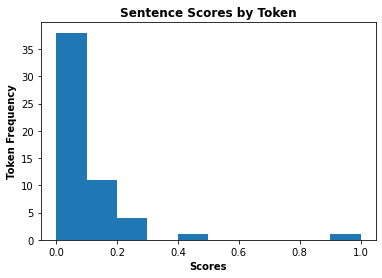

In [196]:
import matplotlib.pyplot as plt
sentences = list(doc.sents)

def sentence_len(sentence):
    count = 0
    for token in sentence:
        if not(token.is_space or token.is_punct):
            count += 1
    return count

def score_sentence_by_token(sentence, top_tokens):
    tokens = 0
    if sentence_len(sentence) == 0:
        return 0
    for token in sentence:
        if str(token).lower() in top_tokens:
            tokens += 1
    return tokens/sentence_len(sentence)

# make a list of token scores
token_scores_list = []

for sentence in sentences:
    token_scores_list.append(score_sentence_by_token(sentence, top_tokens))
print('The scores or each sentence by token:')
print(token_scores_list)

# plot histogram
plt.hist(token_scores_list)
plt.title('Sentence Scores by Token',fontweight = 'bold')
plt.ylabel('Token Frequency',fontweight = 'bold')
plt.xlabel('Scores', fontweight = 'bold')
plt.show()

# The largest number of scores by token fall in the 0.0 to 0.1 range. 

## Question 7:

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

The scores or each sentence by lemmas:
[0.030303030303030304, 0.0, 0.0, 0.038461538461538464, 0.0, 0.5, 0.25, 0.08695652173913043, 0.047619047619047616, 0.13333333333333333, 0.0, 0.045454545454545456, 0.1111111111111111, 0.045454545454545456, 0.125, 0.05, 0.0, 0.11538461538461539, 0.05263157894736842, 0.0, 0.0, 0.03773584905660377, 0.0, 0.03333333333333333, 0.29411764705882354, 0.05555555555555555, 0.0, 0.09523809523809523, 0.21212121212121213, 0.05263157894736842, 0.0, 0.12903225806451613, 0.0, 0.0, 0.0, 0.07142857142857142, 0.14285714285714285, 0.05714285714285714, 0.0, 0.0, 0.0, 0.125, 0.14634146341463414, 0.06666666666666667, 0.0, 0.0, 0.1111111111111111, 0.0, 0.04, 0.030303030303030304, 0.08695652173913043, 0.037037037037037035, 0.041666666666666664, 0.0, 0.4]


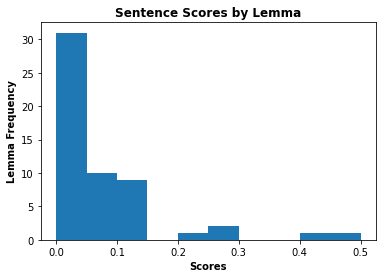

In [197]:
def sentence_lemma_len(sentence):
    count = 0
    for lemma in sentence:
        if not(lemma.is_space or lemma.is_punct):
            count += 1
    return count

def score_sentence_by_lemma(sentence, top_lemmas):
    lemmas = 0
    if sentence_lemma_len(sentence) == 0:
        return 0
    for lemma in sentence:
        if str(lemma).lower() in top_lemmas:
            lemmas += 1
    return lemmas/sentence_lemma_len(sentence)

# make a list of token scores
lemma_scores_list = []

for sentence in sentences:
    lemma_scores_list.append(score_sentence_by_lemma(sentence, top_lemmas))
print('The scores or each sentence by lemmas:')
print(lemma_scores_list)

# plot histogram
plt.hist(lemma_scores_list)
plt.title('Sentence Scores by Lemma',fontweight = 'bold')
plt.ylabel('Lemma Frequency',fontweight = 'bold')
plt.xlabel('Scores', fontweight = 'bold')
plt.show()

# The range is a bit lower for the lemmas and doesn't have as wide of range. The largest lemma range appears to fall in the 0.0 to 0.05 range.

## Question 8:

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).


##### Below is sample of changing the codes to only consider the nouns. When looking at the results, there shouldn't be much change. However, of interesting note, when tokens are set to nouns it removed the word LED, I think it must read it as a verb, even though in this article it is being used as a noun to refer to the light. For the top 5 Lemmas, LED made the list still.  


In [198]:
def we_care_about_nouns(token):
    for token in token:
        if token.pos_ == 'NOUN':
            return not (token.is_space or token.is_punct or token.is_stop)

interesting_ntokens = [str(token).lower() for token in doc if token.pos_ == 'NOUN']
noun_word_freq = Counter(map(str,interesting_ntokens))


ntokens = set()
for token, freq in noun_word_freq.most_common(5):
    ntokens.add(token)

#comparing tokens vs. tokens that are nouns
print('Top 5 Tokens',word_freq.most_common(5))
print('VS.')
print("Top 5 Noun Tokens", noun_word_freq.most_common(5))
print()

#Lemmas that are nouns

interesting_nlemmas = [token.lemma_.lower() for token in doc if token.pos_ == 'NOUN']
noun_lemma_freq = Counter(interesting_nlemmas)


nlemmas = set()
for token, freq in noun_lemma_freq.most_common(5):
    nlemmas.add(token)
    
#comparing lemmas vs. lemmas that are nouns
print()
print("Top 5 Lemmas",lemma_freq.most_common(5))
print('VS.')
print("Top 5 Noun Lemmas", noun_lemma_freq.most_common(5))

Top 5 Tokens [('laser', 35), ('headlights', 19), ('headlight', 11), ('technology', 10), ('led', 10)]
VS.
Top 5 Noun Tokens [('laser', 30), ('headlights', 17), ('technology', 10), ('headlight', 8), ('beam', 7)]


Top 5 Lemmas [('laser', 40), ('headlight', 28), ('beam', 12), ('led', 12), ('light', 11)]
VS.
Top 5 Noun Lemmas [('laser', 35), ('headlight', 25), ('beam', 12), ('technology', 10), ('led', 9)]
